![tower_bridge](tower_bridge.jpeg)

The dataset used in this project is sourced from DataCamp.

### Task: 
Find the best model to predict temperatures in London!

### Background:
As the climate changes, predicting the weather becomes ever more important for businesses. Since the weather depends on a lot of different factors, you will want to run a lot of experiments to determine what the best approach is to predict the weather. In this project, you will run experiments for different regression models predicting the mean temperature, using `sklearn`.

You will be working with data stored in `london_weather.csv`, which contains the following columns:
- **date** - recorded date of measurement - (**int**)
- **cloud_cover** - cloud cover measurement in oktas - (**float**)
- **sunshine** - sunshine measurement in hours (hrs) - (**float**)
- **global_radiation** - irradiance measurement in Watt per square meter (W/m2) - (**float**)
- **max_temp** - maximum temperature recorded in degrees Celsius (°C) - (**float**)
- **mean_temp** - mean temperature in degrees Celsius (°C) - (**float**)
- **min_temp** - minimum temperature recorded in degrees Celsius (°C) - (**float**)
- **precipitation** - precipitation measurement in millimeters (mm) - (**float**)
- **pressure** - pressure measurement in Pascals (Pa) - (**float**)
- **snow_depth** - snow depth measurement in centimeters (cm) - (**float**)

## Instructions

Test three different regression models on historical London weather data.

For this project, you will use the London weather dataset from 1979 to 2021. The goal is to automatically process and test different models using sklearn. You will use weather data to predict the mean temperature on a given day.

The result of this project should be three different regression models (linear regression, decision tree regressor, and random forest regressor) and their results.

Perform exploratory data analysis, preprocessing, training, prediction, and evaluation of machine learning models to predict "mean_temp" from the london_weather.csv.

## My approach

Exploratory data analysis

1. Load the data from london_weather.csv to understand its contents

2. Determine the column names, data types, number of non-null vales

3. Convert 'date' column to datetime type

Data visualization

1. Explore the data by visualizing the features, and how the target variable, mean_temp, varies with each.

2. Based on the visualizations made in step 2, we find that we can pick a subset of features to predict the mean temperature.

Preprocess data

1. Use the imputer to account for missing values, and then normalize the features using the scaler. Make sure to split the data into train and test samples. 

Feature selection

1. PCA is used to reduce the dimensionality of the feature set, so that the reduced feature set explains 80% of the total variance.

Machine learning training and evaluation

1. Fit three regression models, linear regression, decision tree, and random forest regressor.

2. Training and evaluation the machine learning models using rmse.

In [1]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt # added

# EDA

In [2]:
# Load data and perform exploratory analysis
weather = pd.read_csv('london_weather.csv')

In [3]:
# Determine the column names, data types, number of non-null vales
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [4]:
# Convert 'date' column to datetime type
weather['date'] = pd.to_datetime(weather['date'],format='%Y%m%d')
# Extract year, month, and day features
weather['Year'] = weather['date'].dt.year
weather['Month'] = weather['date'].dt.month
weather['Day'] = weather['date'].dt.day
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       15322 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15322 non-null  float64       
 4   max_temp          15335 non-null  float64       
 5   mean_temp         15305 non-null  float64       
 6   min_temp          15339 non-null  float64       
 7   precipitation     15335 non-null  float64       
 8   pressure          15337 non-null  float64       
 9   snow_depth        13900 non-null  float64       
 10  Year              15341 non-null  int64         
 11  Month             15341 non-null  int64         
 12  Day               15341 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 1.5 MB


In [5]:
weather.describe()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Year,Month,Day
count,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000,15341.000000,15341.000000,15341.000000
mean,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986,1999.500359,6.522782,15.730070
std,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633,12.121708,3.448856,8.800562
min,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000,1979.000000,1.000000,1.000000
25%,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000,1989.000000,4.000000,8.000000
50%,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000,2000.000000,7.000000,16.000000
75%,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000,2010.000000,10.000000,23.000000
max,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000,2020.000000,12.000000,31.000000


In [6]:
print("Distinct days are: ",weather.Day.unique())
print("Distinct Months are: ",weather.Month.unique())
print("Distinct Years are: ",weather.Year.unique())
print("Distinct values of Cloud cover are: ",weather.cloud_cover.unique())
print("Distinct values of snow depth are: ",weather.snow_depth.unique())

Distinct days are:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Distinct Months are:  [ 1  2  3  4  5  6  7  8  9 10 11 12]
Distinct Years are:  [1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Distinct values of Cloud cover are:  [ 2.  6.  5.  8.  4.  7.  1.  3. nan  0.  9.]
Distinct values of snow depth are:  [ 9.  8.  4.  2.  1.  0.  6.  7. 22. 20. 16. 18. 15. 13. 11. 10.  3.  5.
 12. nan]


# Data visualisation

/var/folders/qm/sbby5mpx22g9cm6655g9bwcw0000gn/T/ipykernel_6988/1870141219.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = weather.corr()


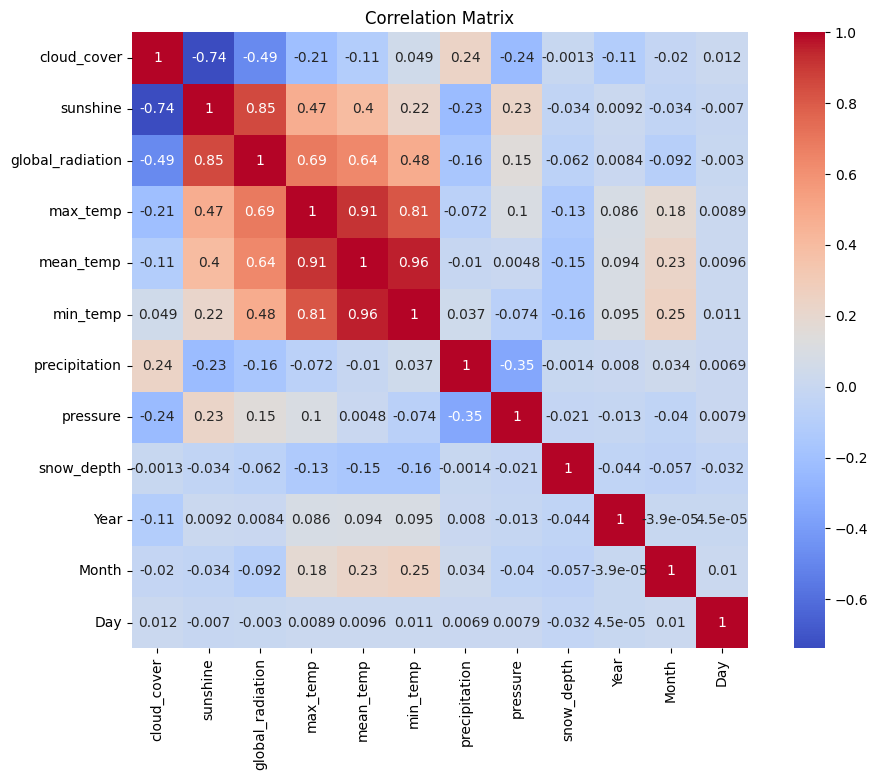

In [7]:
# Compute the correlation matrix
corr_matrix = weather.corr()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Show the plot
plt.title('Correlation Matrix')
plt.show()

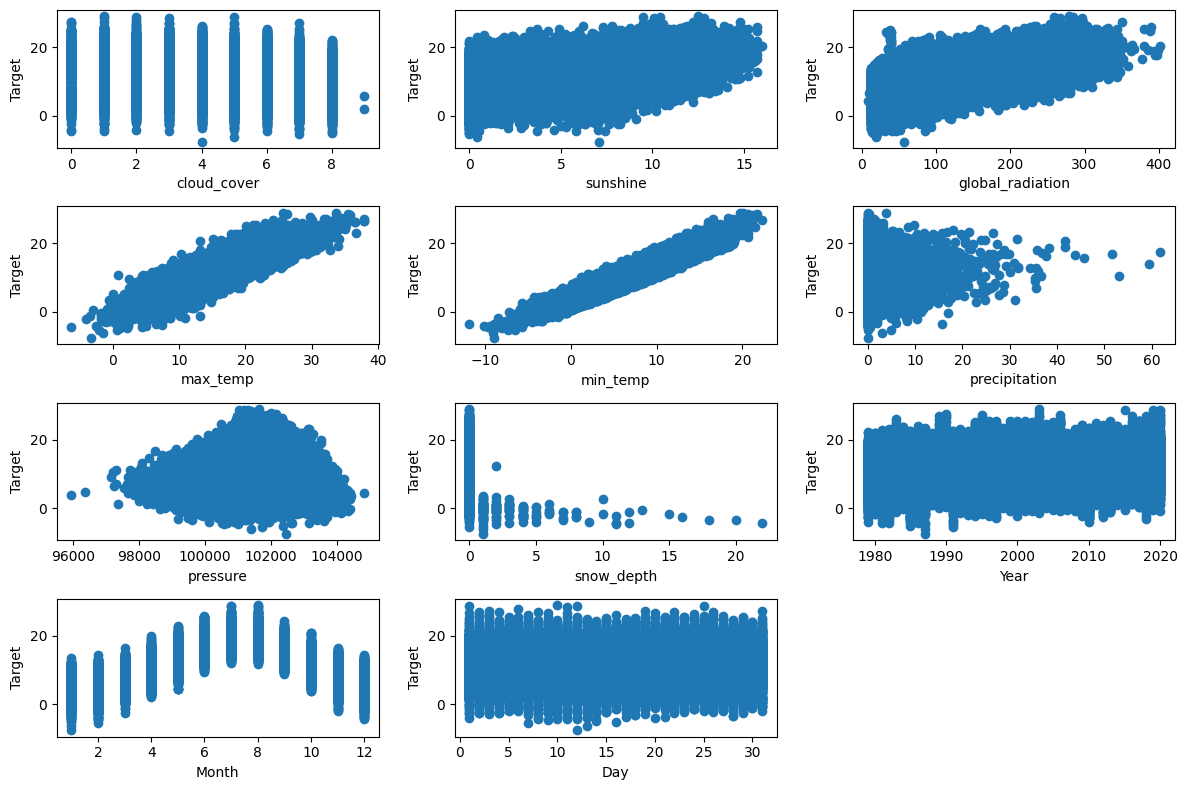

In [8]:
# scatter plot

features = weather.iloc[:,[1,2,3,4,6,7,8,9,10,11,12]]

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the width and height as desired

# Plot scatter plots of features against the target variable
for i, feature in enumerate(features):
    plt.subplot(4, 3, i+1)  # Adjust the number of rows and columns as needed
    plt.scatter(weather[feature], weather['mean_temp'])
    plt.xlabel(feature)
    plt.ylabel('Target')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

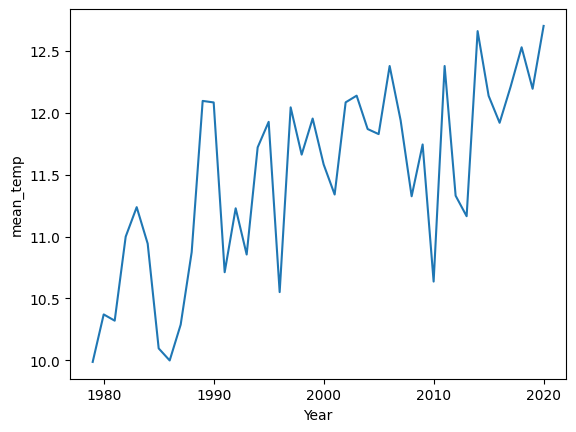

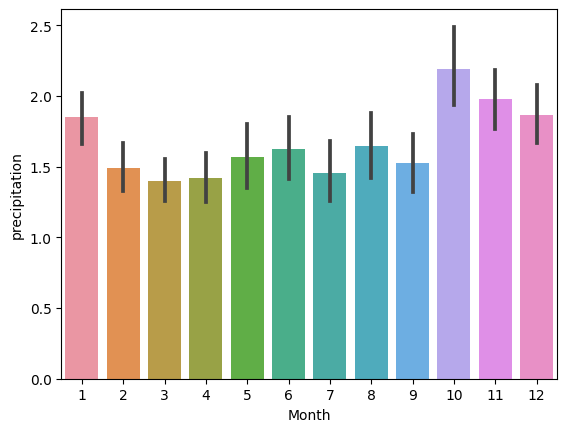

In [9]:
# Visualise the variation of mean_temp with year as line plot
sns.lineplot(x="Year", y="mean_temp", data=weather, ci=None)
plt.show()
# Visualise the variation of precipitation with month as bar chart
sns.barplot(x='Month', y='precipitation', data=weather)
plt.show()

# Data Preprocessing

In [10]:
# drop the date column
weather = weather.drop("date",axis=1)
# drop rows with null values in mean_temp column
weather = weather.dropna(subset=['mean_temp'])

In [11]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15305 entries, 0 to 15340
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15286 non-null  float64
 1   sunshine          15305 non-null  float64
 2   global_radiation  15286 non-null  float64
 3   max_temp          15305 non-null  float64
 4   mean_temp         15305 non-null  float64
 5   min_temp          15305 non-null  float64
 6   precipitation     15303 non-null  float64
 7   pressure          15301 non-null  float64
 8   snow_depth        13881 non-null  float64
 9   Year              15305 non-null  int64  
 10  Month             15305 non-null  int64  
 11  Day               15305 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 1.5 MB


In [12]:
weather

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Year,Month,Day
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979,1,1
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979,1,2
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979,1,3
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979,1,4
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
15336,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN,2020,12,27
15337,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN,2020,12,28
15338,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN,2020,12,29
15339,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN,2020,12,30


In [13]:
def preprocess_df(df):
    """
    Split dataframe into X and y, and train and test consecutively. Then impute and scale both train and test features. Returns the train and test sets
    """
    # Complete this function
    training_data, testing_data = train_test_split(weather,test_size=0.2, random_state=25)
    X_train = training_data.iloc[:,[0,1,2,3,4,6,7,8,9,10,11]]
    X_test = testing_data.iloc[:,[0,1,2,3,4,6,7,8,9,10,11]]
    y_train = training_data.iloc[:,5]
    y_test = testing_data.iloc[:,5]
    
    # Impute missing values
    imputer = SimpleImputer(strategy="mean")
    # Fit on the training data
    X_train = imputer.fit_transform(X_train)
    # Transform on the test data
    X_test  = imputer.transform(X_test)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train) 
    X_test = scaler.fit_transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [14]:
X_train, X_test, y_train, y_test = preprocess_df(weather)

# Feature selection

In [15]:
# Apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=11)  # Specify the number of components to keep
X_pca = pca.fit_transform(X_train) # train and project the data onto Principal components

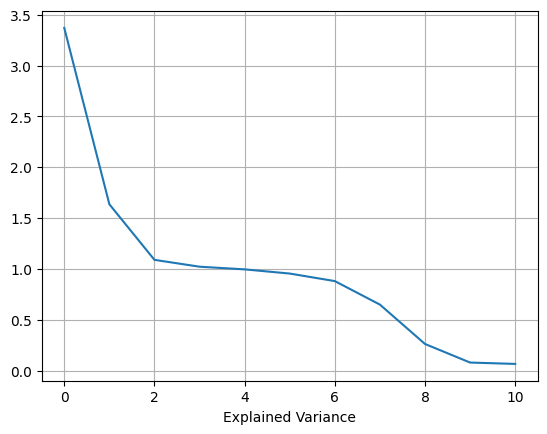

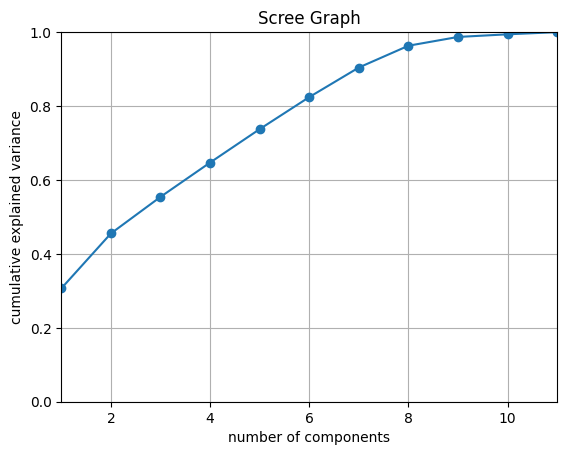

In [16]:
plt.plot(pca.explained_variance_); plt.grid();
plt.xlabel('Explained Variance')
plt.figure()
plt.plot(np.arange(len(pca.explained_variance_ratio_))+1,np.cumsum(pca.explained_variance_ratio_),'o-') #plot the scree graph
plt.axis([1,len(pca.explained_variance_ratio_),0,1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Scree Graph')
plt.grid()
plt.show()

The scree plot shows that 6 components explain more than 80% of the variance.

In [17]:
# train pca with 6 components
pca6 = PCA(n_components=6)  # Specify the number of components to keep
X_train_pca = pca6.fit_transform(X_train)

# Machine learning training and evaluation

In [18]:
# Linear Regression

# Train a linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train_pca, y_train)

# transform the test set
X_test_pca = pca6.transform(X_test)

# Make predictions on the transformed test set
y_pred = regression_model.predict(X_test_pca)

In [19]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 2.490222602283379


In [20]:
# Decision tree

# Train a Decision Tree regression model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_pca, y_train)

# Make predictions on the transformed test set
y_pred = tree_model.predict(X_test_pca)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 2.8265420720271552


In [21]:
# Random forest regressor

# Train a Random Forest regression model
forest_model = RandomForestRegressor()
forest_model.fit(X_train_pca, y_train)

# Make predictions on the transformed test set
y_pred = forest_model.predict(X_test_pca)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 2.044415781892685


The Random Forest Regressor has the smallest rmse on the test set, and hence is the best performing model among the three. 